In [55]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display
import matplotlib.pyplot as plt
# from IPython.display import Image, display

In [56]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
#             print(dot_string)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
            
def show_stats(directory):
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    ax.add_artist(first_legend)

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)

    plt.show()
    plt.close(fig)

    
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

def box_plot(df, x, y, xlabel, ylabel, title, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
#         color = color_assignment_dict.get(strat)
        ax.box_plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.show()
    plt.close(fig)
#     return plt

In [57]:
df_diff_nums_lfs=show_stats('../experiment_diff_num_lfs_611/')
df_diff_user_input=show_stats('../exp_612_repeated/')

In [58]:
df_diff_nums_lfs['strat'] = df_diff_nums_lfs['strat'].str.replace('information_gain', 'decision tree')
df_diff_nums_lfs['user_input_size'] = df_diff_nums_lfs['num_complaints'] + df_diff_nums_lfs['confirmation_cnt']
df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['num_complaints']/df_diff_nums_lfs['user_input_size']
df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_diff_nums_lfs['accuracy_improvement'] = df_diff_nums_lfs['new_global_accuracy']/df_diff_nums_lfs['global_accuracy']
# grouped = df_diff_nums_lfs.groupby(['strat','complaint_ratio','user_input_size','deletion_factor','num_functions']).mean()
df_diff_user_input['strat'] = df_diff_user_input['strat'].str.replace('information_gain', 'decision tree')
df_diff_user_input['user_input_size'] = df_diff_user_input['num_complaints'] + df_diff_user_input['confirmation_cnt']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['num_complaints']/df_diff_user_input['user_input_size']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_diff_user_input['accuracy_improvement'] = df_diff_user_input['new_global_accuracy']/df_diff_user_input['global_accuracy']
# # Reset the index
# df_diff_nums_lfs = grouped.reset_index()

# unique_ratios=list(df_diff_nums_lfs['strat'].unique())
# markers=['v','o', '^','h', 'H', '$...$', 'x', '+', 'D', 'd']
# used_markers=len(unique_ratios)
# shape_assignment_dict = {k: v for k, v in zip(unique_ratios, markers[:used_markers])}

# unique_strats=list(df_diff_nums_lfs['complaint_ratio'].unique())
# colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# used_colors=len(unique_strats)
# color_assignment_dict = {k: v for k, v in zip(unique_strats, colors[:used_colors])}

line_color_assignment_dict={'naive':'g','decision tree':'r', 'brute_force': 'b'}

In [59]:
list(df_diff_user_input)

['strat',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'num_functions',
 'deletion_factor',
 'post_fix_num_funcs',
 'num_of_funcs_processed_by_algo',
 'user_input_size',
 'complaint_ratio',
 'accuracy_improvement']

In [60]:
df_diff_user_input_means = df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).mean().reset_index()
df_diff_user_input_std = df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).std().reset_index()
df_diff_user_input_size= df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).size().reset_index()

In [81]:
df_diff_user_input[(df_diff_user_input['strat']!='brute_force') &\
                                      (df_diff_user_input['deletion_factor']==0.5) &\
                      (df_diff_user_input['user_input_size']==160)].sort_values(['strat','user_input_size','complaint_ratio'])

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,user_input_size,complaint_ratio,accuracy_improvement
0,decision tree,1.968,0.162162,16,144,0.506,0.625,0.924,0.612,935,707,40,0.5,37,39,160,10.00%,1.209486
0,decision tree,1.657,0.102564,16,144,0.506,0.688,0.868,0.602,935,719,40,0.5,39,39,160,10.00%,1.189723
0,decision tree,1.188,0.153846,16,144,0.506,0.625,0.889,0.629,935,719,40,0.5,39,39,160,10.00%,1.243083
0,decision tree,1.490,0.102564,16,144,0.506,0.375,0.924,0.594,935,719,40,0.5,39,39,160,10.00%,1.173913
0,decision tree,1.162,0.100000,16,144,0.506,0.062,1.000,0.505,935,935,40,0.5,40,39,160,10.00%,0.998024
0,decision tree,1.492,0.256410,16,144,0.506,0.750,0.903,0.634,935,719,40,0.5,39,39,160,10.00%,1.252964
0,decision tree,0.989,0.054054,16,144,0.506,0.562,0.944,0.609,935,713,40,0.5,37,39,160,10.00%,1.203557
0,decision tree,1.582,0.051282,16,144,0.506,0.562,0.903,0.631,935,719,40,0.5,39,39,160,10.00%,1.247036
0,decision tree,1.279,0.157895,16,144,0.506,0.438,0.944,0.609,935,714,40,0.5,38,39,160,10.00%,1.203557
0,decision tree,1.236,0.210526,16,144,0.506,0.375,0.924,0.608,935,714,40,0.5,38,39,160,10.00%,1.201581


In [78]:
df_diff_user_input_std[(df_diff_user_input_std['strat']!='brute_force') &\
                                      (df_diff_user_input_std['deletion_factor']==0.5) &\
                      (df_diff_user_input_std['user_input_size']==320)]

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,accuracy_improvement
102,decision tree,320,10.00%,0.5,2.211603,0.048686,0.0,0.0,0.0,0.097822,0.011963,0.014432,0.0,19.425356,0.0,1.059350,0.0,0.028521
106,decision tree,320,30.00%,0.5,1.840838,0.063883,0.0,0.0,0.0,0.169999,0.029937,0.060349,0.0,76.956265,0.0,1.567021,0.0,0.119267
110,decision tree,320,50.00%,0.5,1.322524,0.078238,0.0,0.0,0.0,0.042206,0.037686,0.025158,0.0,69.961021,0.0,1.398412,0.0,0.049718
114,decision tree,320,70.00%,0.5,1.829367,0.117906,0.0,0.0,0.0,0.247127,0.221068,0.089312,0.0,127.433468,0.0,1.449138,0.0,0.176507
118,decision tree,320,90.00%,0.5,0.971615,0.106303,0.0,0.0,0.0,0.155447,0.210916,0.133334,0.0,69.557650,0.0,1.337494,0.0,0.263506
222,naive,320,10.00%,0.5,0.106479,0.000000,0.0,0.0,0.0,0.160049,0.038108,0.065953,0.0,76.013522,0.0,1.686548,0.0,0.130341
226,naive,320,30.00%,0.5,0.101700,0.000000,0.0,0.0,0.0,0.176394,0.201590,0.144320,0.0,81.078563,0.0,1.370320,0.0,0.285217
230,naive,320,50.00%,0.5,0.148409,0.000000,0.0,0.0,0.0,0.107468,0.157367,0.078178,0.0,91.503734,0.0,1.349897,0.0,0.154502
234,naive,320,70.00%,0.5,0.025114,0.000000,0.0,0.0,0.0,0.088802,0.259474,0.118418,0.0,98.111105,0.0,1.418136,0.0,0.234028
238,naive,320,90.00%,0.5,0.118625,0.029924,0.0,0.0,0.0,0.243935,0.164735,0.108557,0.0,150.786236,0.0,1.567021,0.0,0.214539


In [61]:
df_diff_user_input_runtime=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
                                      (df_diff_user_input_means['deletion_factor']==0.5)]
df_diff_user_input_avg_tree=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
                                      (df_diff_user_input_means['deletion_factor']==0)]
df_diff_user_input_deletion_factor=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force')&\
                                                     (df_diff_user_input_means['complaint_ratio']=='50.00%')]

In [62]:
df_diff_user_input_deletion_factor

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,accuracy_improvement
8,decision tree,10,50.00%,0.0,0.0426,0.015000,5.0,5.0,0.506,0.0000,0.9600,0.5071,935.0,935.0,40.0,40.0,39.0,1.002174
9,decision tree,10,50.00%,0.3,0.0429,0.035000,5.0,5.0,0.506,0.0200,0.9800,0.5139,935.0,935.0,40.0,40.0,39.0,1.015613
10,decision tree,10,50.00%,0.5,0.0428,0.040128,5.0,5.0,0.506,0.0200,0.9800,0.5055,935.0,934.0,40.0,39.8,39.0,0.999012
11,decision tree,10,50.00%,0.7,0.0429,0.000000,5.0,5.0,0.506,0.1600,1.0000,0.5284,935.0,886.3,40.0,39.3,39.0,1.044269
28,decision tree,20,50.00%,0.0,0.0797,0.065000,10.0,10.0,0.506,0.0100,0.9600,0.5054,935.0,935.0,40.0,40.0,39.0,0.998814
29,decision tree,20,50.00%,0.3,0.0739,0.095000,10.0,10.0,0.506,0.0100,0.9900,0.5063,935.0,935.0,40.0,40.0,39.0,1.000593
30,decision tree,20,50.00%,0.5,0.0805,0.020128,10.0,10.0,0.506,0.0500,0.9300,0.4971,935.0,927.4,40.0,39.5,39.0,0.982411
31,decision tree,20,50.00%,0.7,0.0752,0.000000,10.0,10.0,0.506,0.3000,0.9200,0.5503,935.0,843.1,40.0,39.1,39.0,1.087549
48,decision tree,40,50.00%,0.0,0.1603,0.195000,20.0,20.0,0.506,0.0050,0.9550,0.5100,935.0,935.0,40.0,40.0,39.0,1.007905
49,decision tree,40,50.00%,0.3,0.1591,0.135000,20.0,20.0,0.506,0.0150,0.9800,0.5059,935.0,935.0,40.0,40.0,39.0,0.999802


In [63]:
# |after_the_fix| / |size_pre_fix| * deletion_factor op 1 

#   10 / 4 * 0.5 > 1

# The following are without brute force
###  1. fix deletion factor at 0.5, see the complaint ratio vs runtime for different user input size

`Conclusion from this: the more user complaint we have the more time spent`

In [64]:
df_diff_user_input_runtime.head()

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,accuracy_improvement
2,decision tree,10,10.00%,0.5,0.0427,0.025128,1.0,9.0,0.506,0.0000,1.0000,0.5064,935.0,934.6,40.0,39.9,39.0,1.000791
6,decision tree,10,30.00%,0.5,0.0431,0.015000,3.0,7.0,0.506,0.0333,0.9714,0.5030,935.0,932.4,40.0,39.7,39.0,0.994071
10,decision tree,10,50.00%,0.5,0.0428,0.040128,5.0,5.0,0.506,0.0200,0.9800,0.5055,935.0,934.0,40.0,39.8,39.0,0.999012
14,decision tree,10,70.00%,0.5,0.0435,0.015000,7.0,3.0,0.506,0.0715,1.0000,0.5250,935.0,918.6,40.0,39.6,39.0,1.037549
18,decision tree,10,90.00%,0.5,0.0413,0.030263,9.0,1.0,0.506,0.0556,0.9000,0.5216,935.0,927.2,40.0,39.8,39.0,1.030830


/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


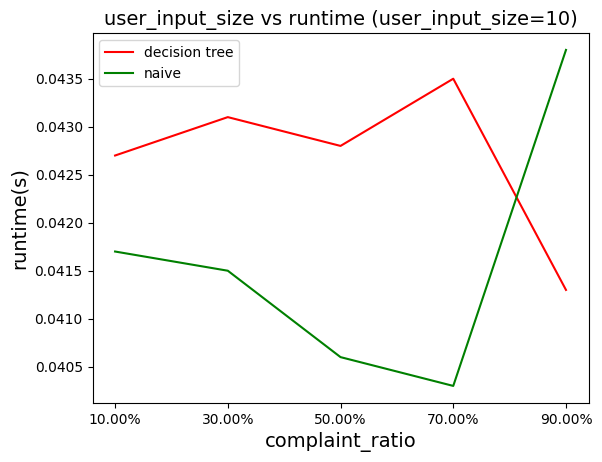

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


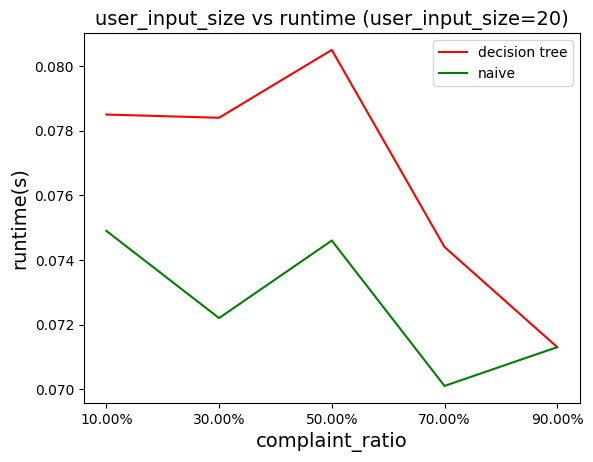

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


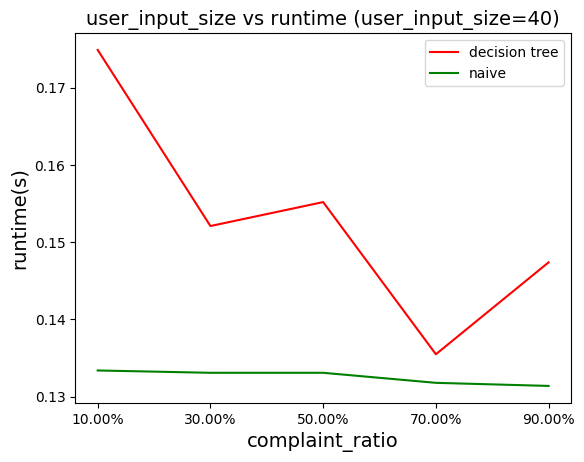

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


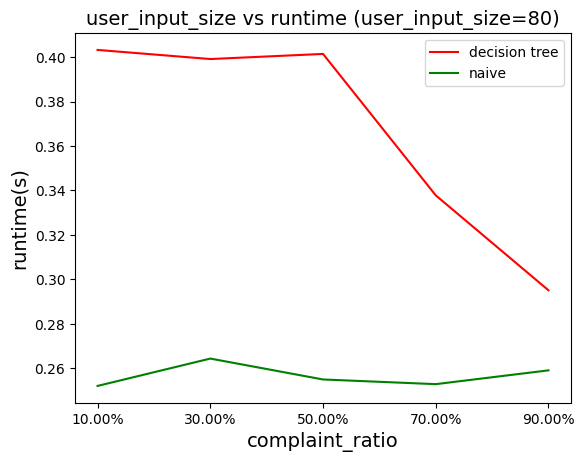

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


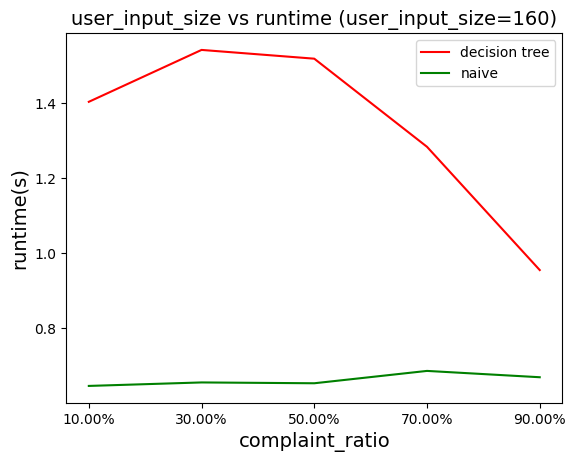

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


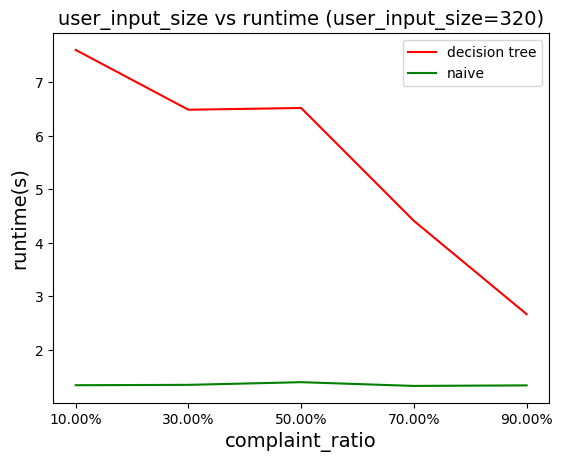

In [65]:
# for input_size in list(df_diff_user_input['user_input_size'].unique()):
#     line_plots(df_without_brute, 'deletion_factor', 'avg_tree_size_increase', 'deletion_factor', 'avg tree size increase', f'deletion_factor vs tree size increase num_func={num_func}', 
#                                 line_color_assignment_dict, 'lower center', num_func)
for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='runtime', 
               xlabel='complaint_ratio',
               ylabel='runtime(s)', 
               title=f'user_input_size vs runtime (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  2. fix deletion factor at 0 (no deletion), see the tree size increase differences for different user input

`Conclusion from this: decision tree version is much better`

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


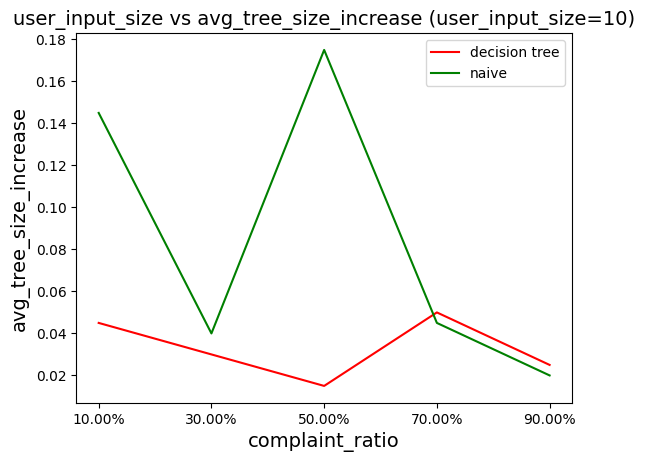

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


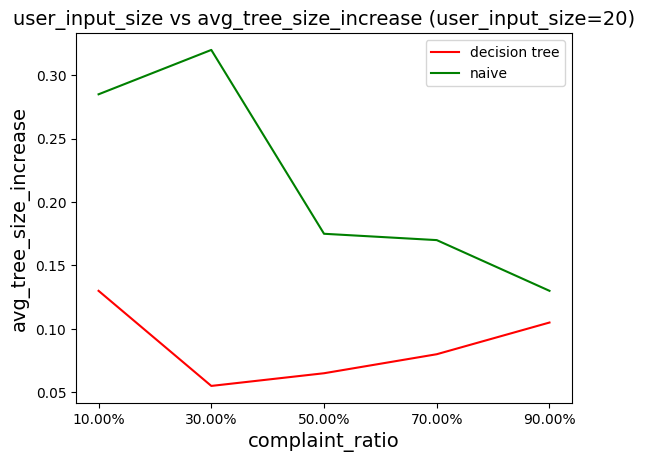

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


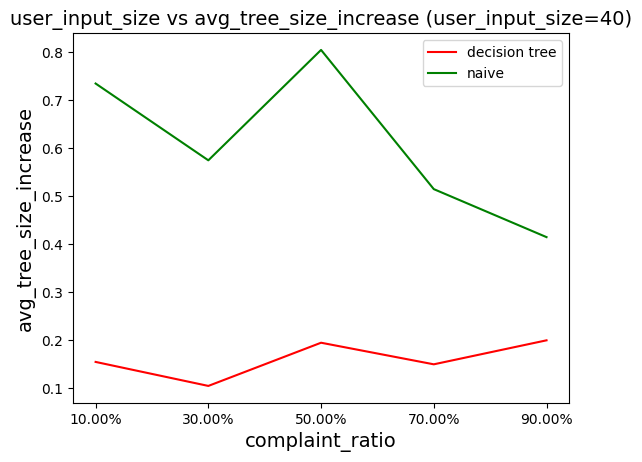

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


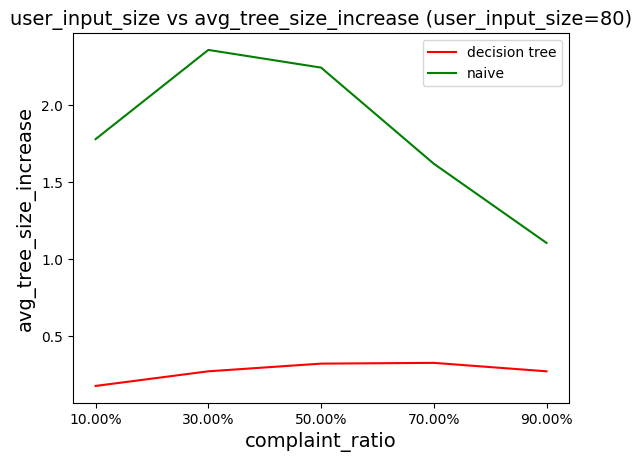

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


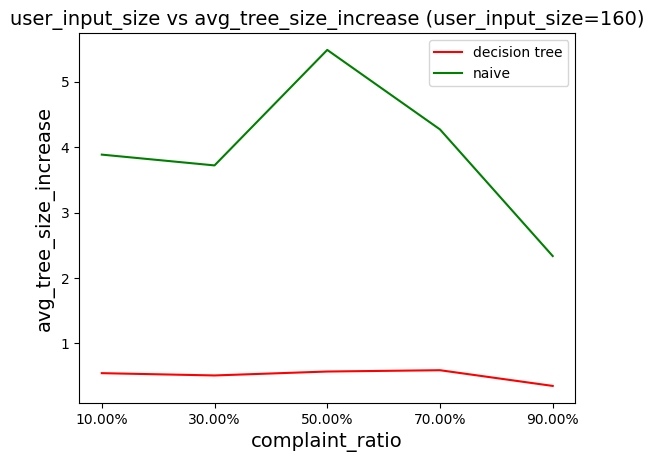

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


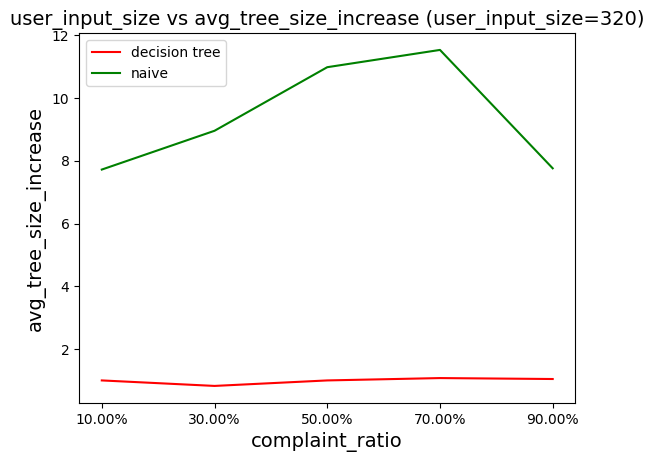

In [66]:
for input_size in list(df_diff_user_input_avg_tree['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_avg_tree, 
               x='complaint_ratio', 
               y='avg_tree_size_increase', 
               xlabel='complaint_ratio',
               ylabel='avg_tree_size_increase', 
               title=f'user_input_size vs avg_tree_size_increase (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  3. fix complaint ratio at 50%, see the tree size increase differences for different user input

`Conclusion from this: both versions the tree sizes converge when deletion factor around 0.3`

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


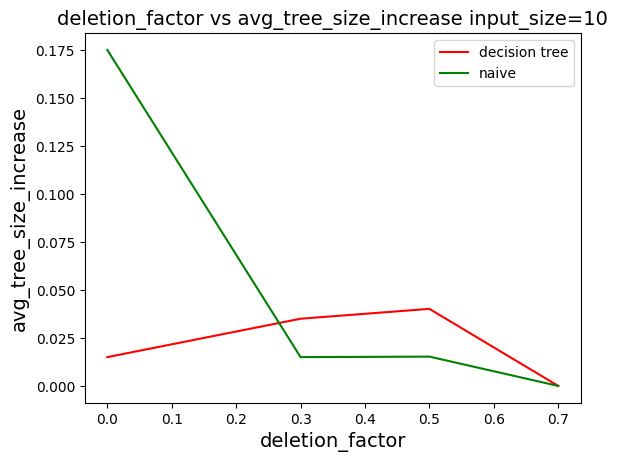

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


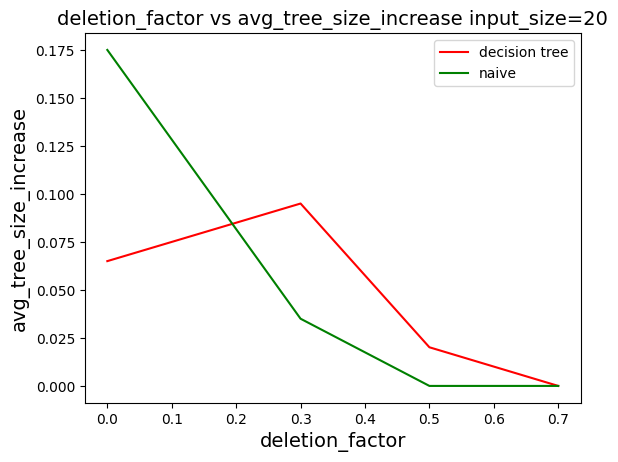

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


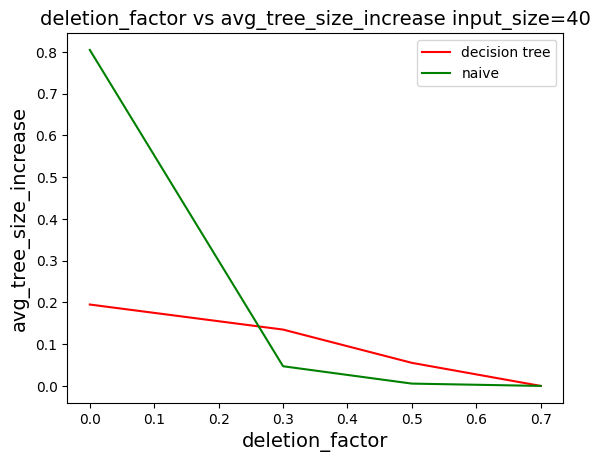

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


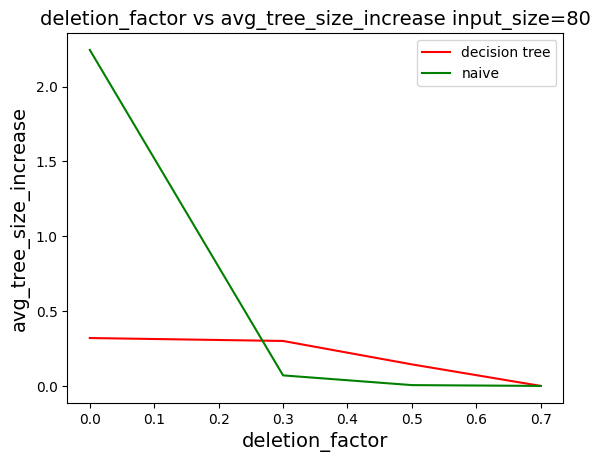

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


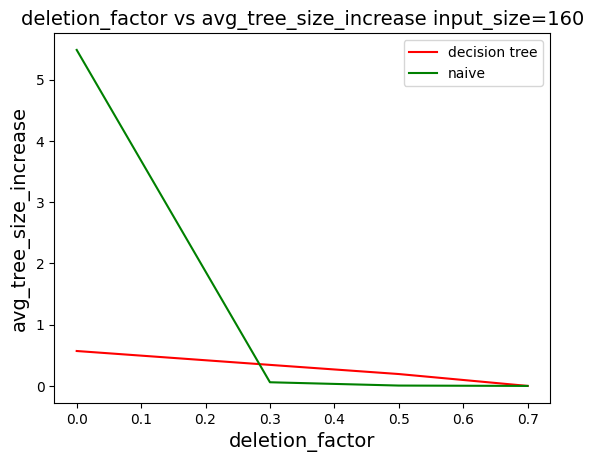

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


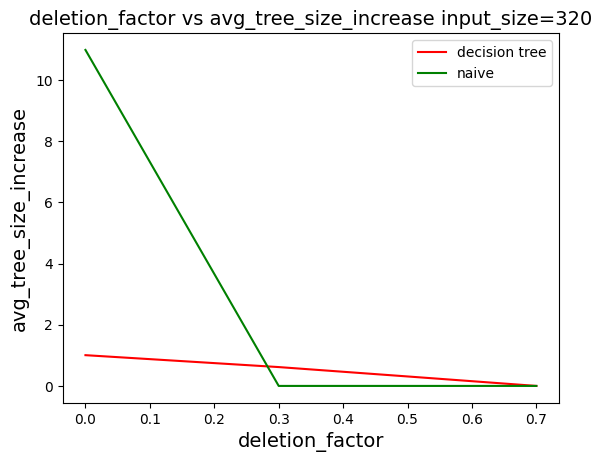

In [67]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='avg_tree_size_increase', 
               xlabel='deletion_factor',
               ylabel='avg_tree_size_increase', 
               title=f'deletion_factor vs avg_tree_size_increase input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

### 4. fix complaint ratio at 50%, see the global accuracy difference for different user input

`Conclusion from this: decision tree is performing worse than naive`

In [68]:
df_diff_user_input_deletion_factor

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,accuracy_improvement
8,decision tree,10,50.00%,0.0,0.0426,0.015000,5.0,5.0,0.506,0.0000,0.9600,0.5071,935.0,935.0,40.0,40.0,39.0,1.002174
9,decision tree,10,50.00%,0.3,0.0429,0.035000,5.0,5.0,0.506,0.0200,0.9800,0.5139,935.0,935.0,40.0,40.0,39.0,1.015613
10,decision tree,10,50.00%,0.5,0.0428,0.040128,5.0,5.0,0.506,0.0200,0.9800,0.5055,935.0,934.0,40.0,39.8,39.0,0.999012
11,decision tree,10,50.00%,0.7,0.0429,0.000000,5.0,5.0,0.506,0.1600,1.0000,0.5284,935.0,886.3,40.0,39.3,39.0,1.044269
28,decision tree,20,50.00%,0.0,0.0797,0.065000,10.0,10.0,0.506,0.0100,0.9600,0.5054,935.0,935.0,40.0,40.0,39.0,0.998814
29,decision tree,20,50.00%,0.3,0.0739,0.095000,10.0,10.0,0.506,0.0100,0.9900,0.5063,935.0,935.0,40.0,40.0,39.0,1.000593
30,decision tree,20,50.00%,0.5,0.0805,0.020128,10.0,10.0,0.506,0.0500,0.9300,0.4971,935.0,927.4,40.0,39.5,39.0,0.982411
31,decision tree,20,50.00%,0.7,0.0752,0.000000,10.0,10.0,0.506,0.3000,0.9200,0.5503,935.0,843.1,40.0,39.1,39.0,1.087549
48,decision tree,40,50.00%,0.0,0.1603,0.195000,20.0,20.0,0.506,0.0050,0.9550,0.5100,935.0,935.0,40.0,40.0,39.0,1.007905
49,decision tree,40,50.00%,0.3,0.1591,0.135000,20.0,20.0,0.506,0.0150,0.9800,0.5059,935.0,935.0,40.0,40.0,39.0,0.999802


/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


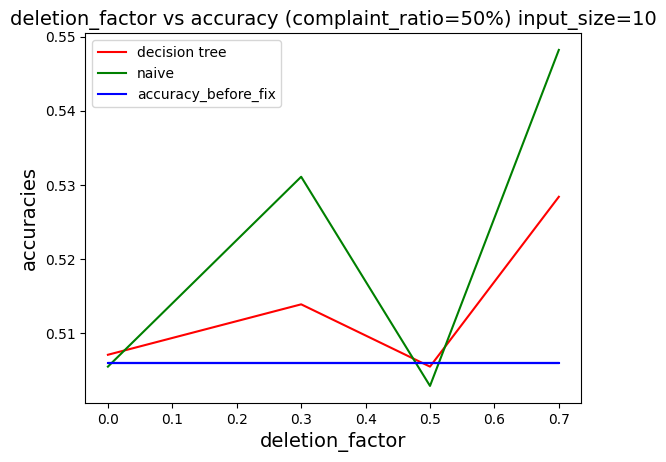

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


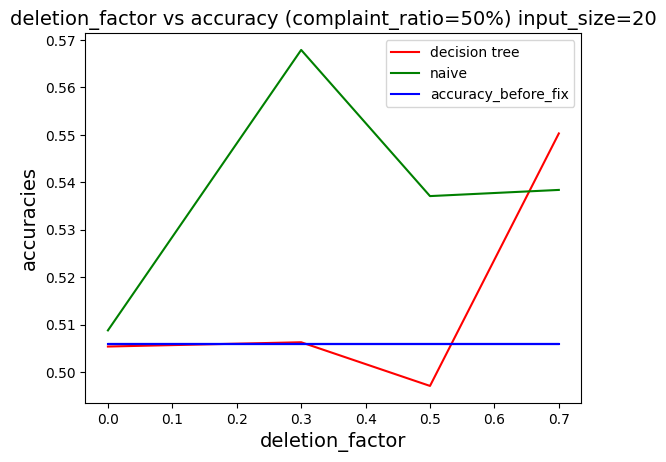

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


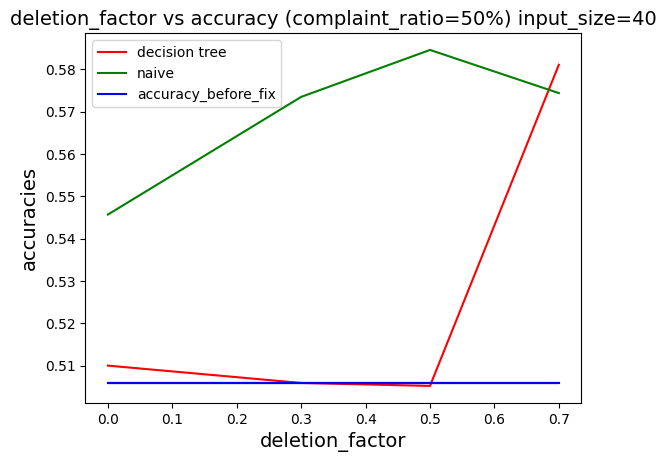

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


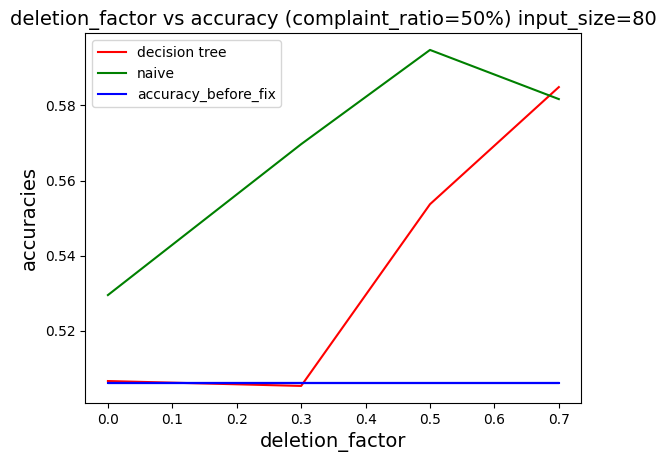

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


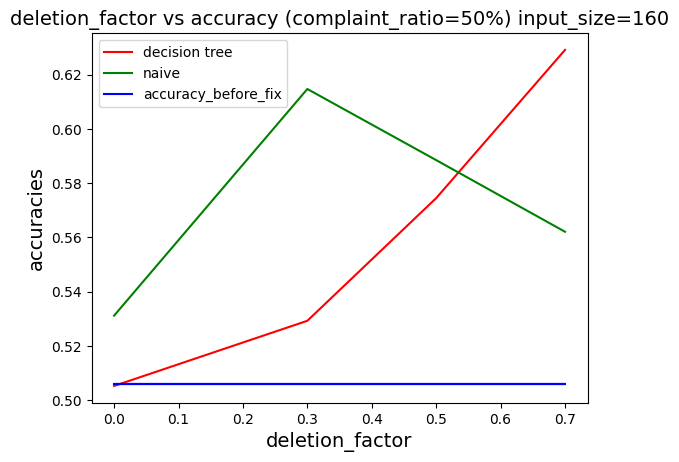

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


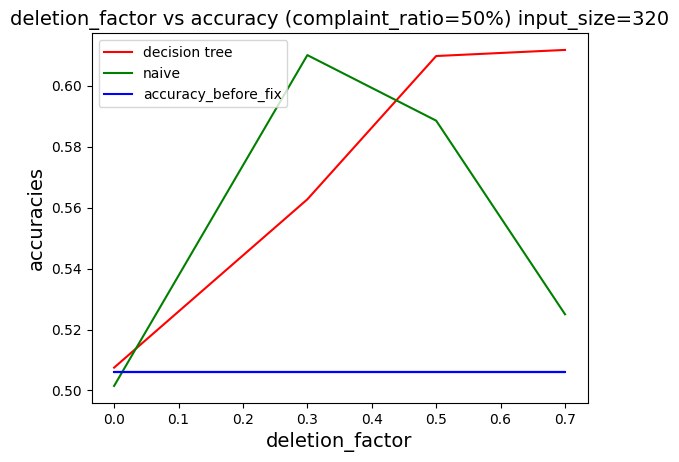

In [69]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==input_size])
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='new_global_accuracy', 
               xlabel='deletion_factor',
               ylabel='accuracies', 
               title=f'deletion_factor vs accuracy (complaint_ratio=50%) input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='accuracy',
               ylim=None)

### 5. fix complaint ratio at 50%, see the number of funcs left for different user input

`Conclusion from this: decision tree is performing worse than naive`

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


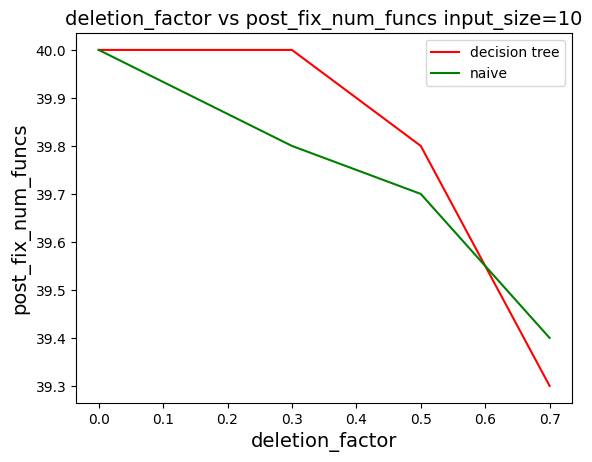

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


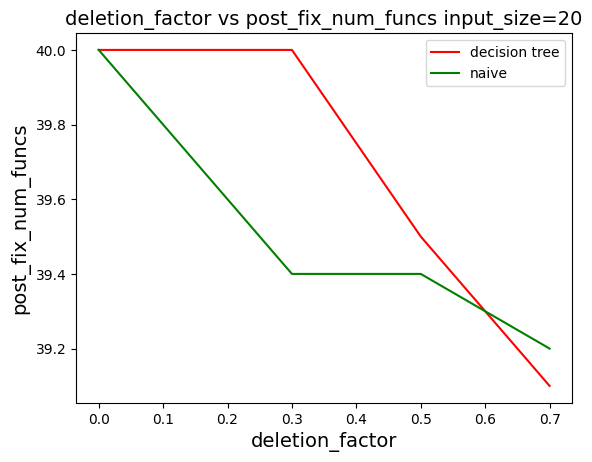

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


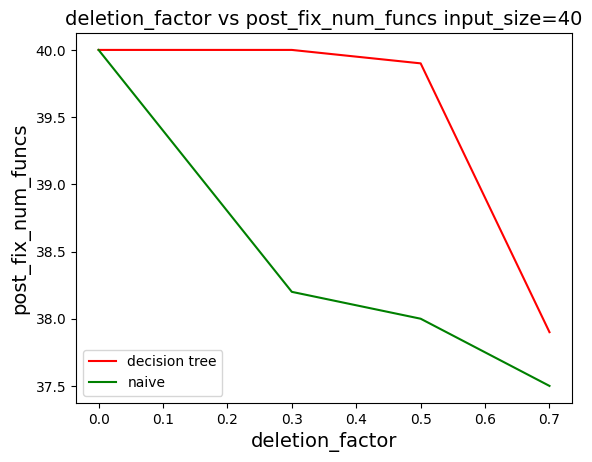

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


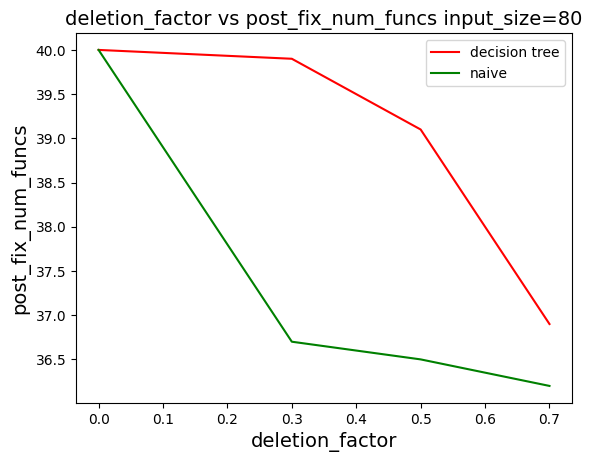

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


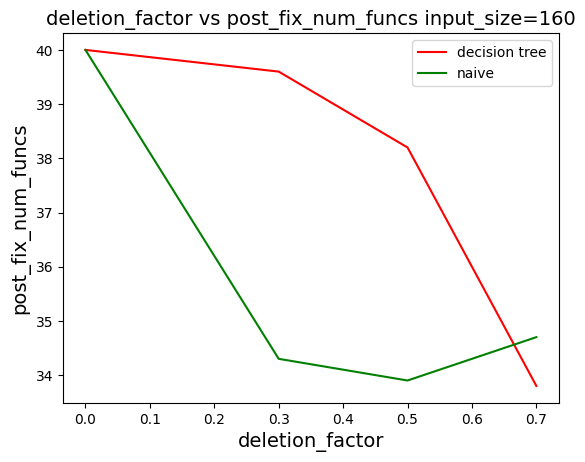

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


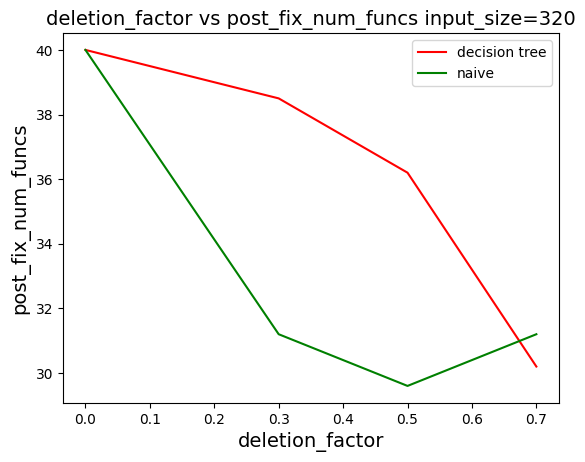

In [70]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='post_fix_num_funcs', 
               xlabel='deletion_factor',
               ylabel='post_fix_num_funcs', 
               title=f'deletion_factor vs post_fix_num_funcs input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [71]:
# import matplotlib.pyplot as plt
# import pandas as pd

# data = {
#     'Category': ['A', 'A', 'B', 'B', 'B', 'A'],
#     'Value': [10, 15, 20, 25, 30, 35]
# }
# df = pd.DataFrame(data)

# # Create a box plot with different x-axis values
# plt.boxplot(df['Value'], positions=[1,2,3,4,5,6])

# # Add labels and title
# plt.xlabel('Category')
# plt.ylabel('Value')
# plt.title('Box Plot')

# # Display the plot
# plt.show()

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


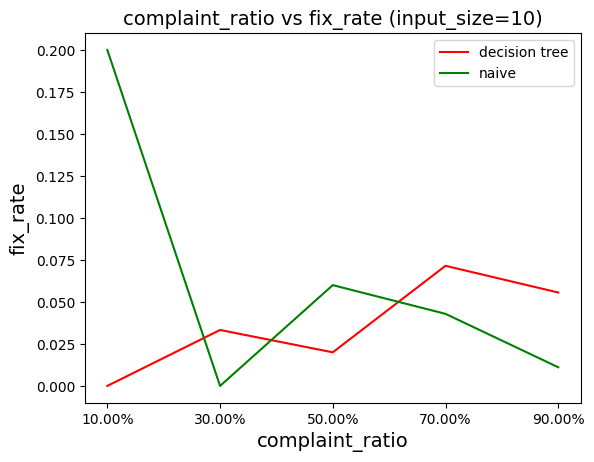

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


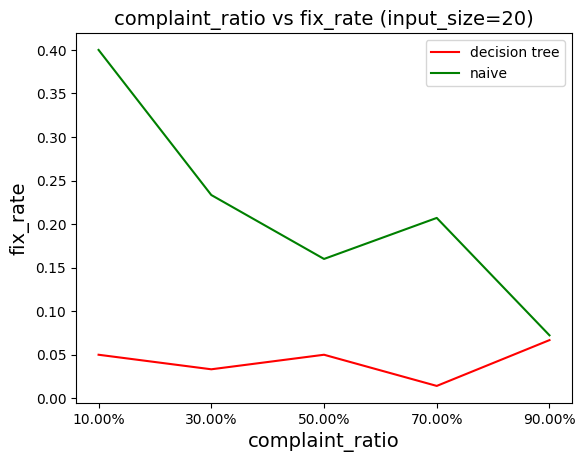

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


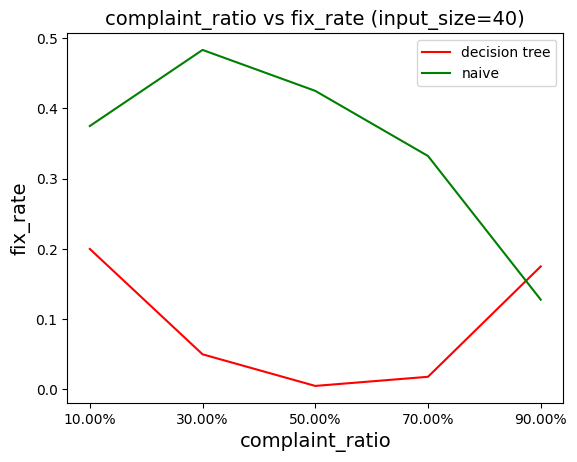

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


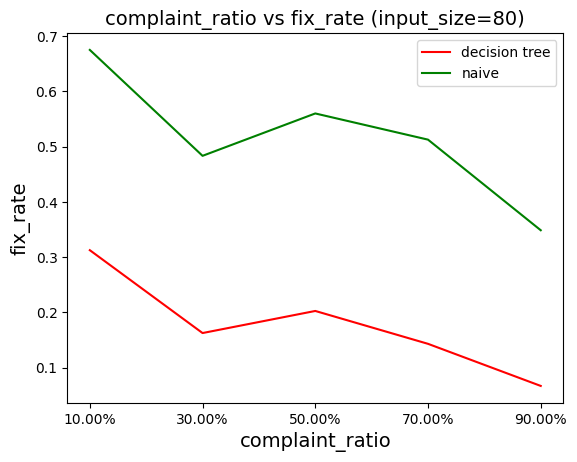

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


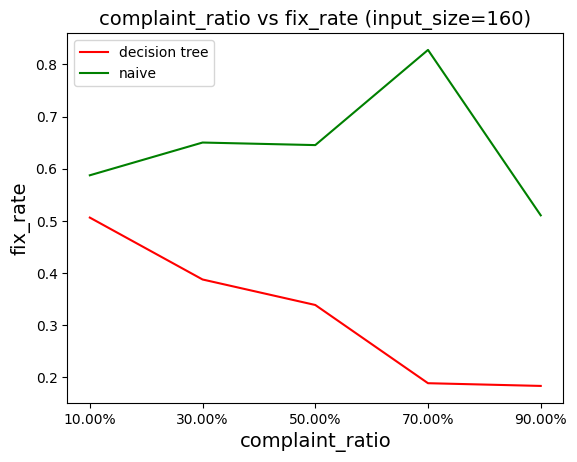

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


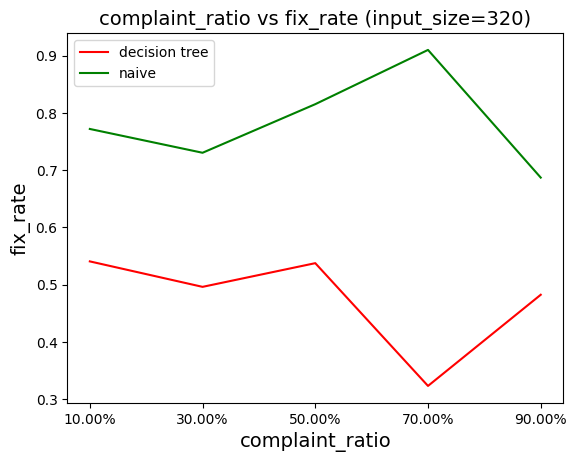

In [72]:
# df_diff_user_input_runtime=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
#                                       (df_diff_user_input_means['deletion_factor']==0.5)]

for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='fix_rate', 
               xlabel='complaint_ratio',
               ylabel='fix_rate', 
               title=f'complaint_ratio vs fix_rate (input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [73]:
list(df_diff_user_input_runtime)

['strat',
 'user_input_size',
 'complaint_ratio',
 'deletion_factor',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'num_functions',
 'post_fix_num_funcs',
 'num_of_funcs_processed_by_algo',
 'accuracy_improvement']

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


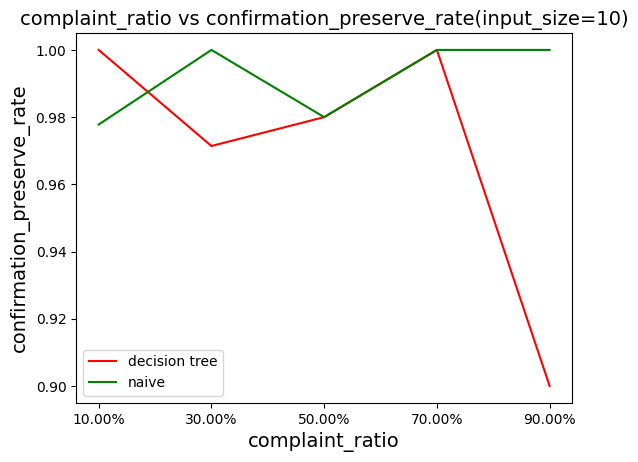

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


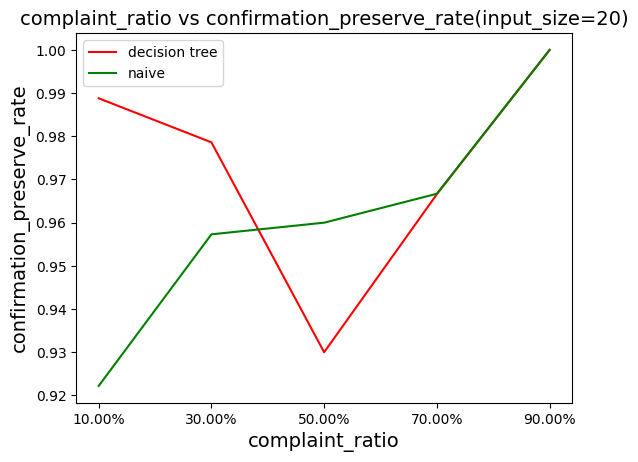

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


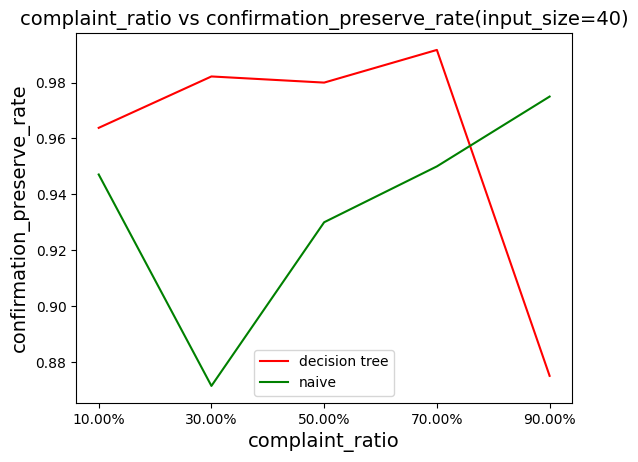

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


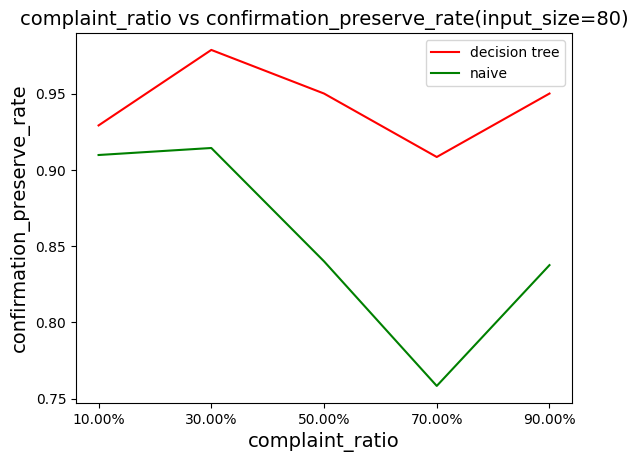

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


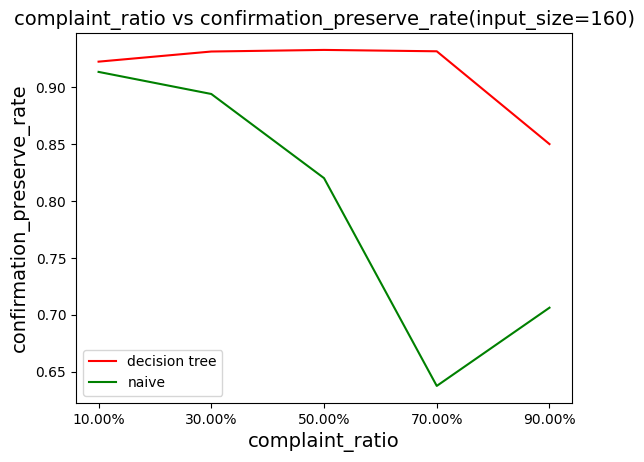

/tmp/ipykernel_2482/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


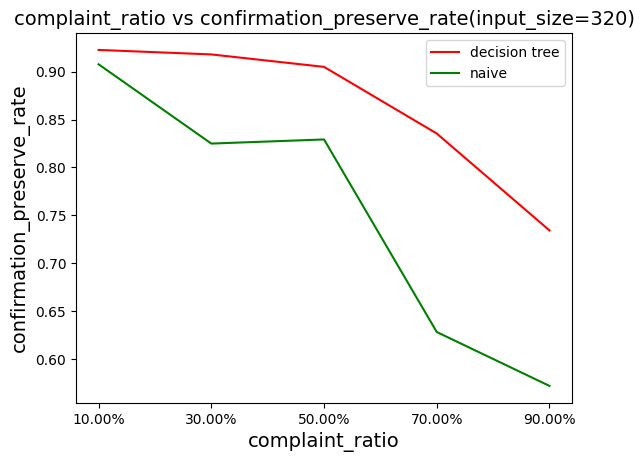

In [74]:
for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='confirm_preserve_rate', 
               xlabel='complaint_ratio',
               ylabel='confirmation_preserve_rate', 
               title=f'complaint_ratio vs confirmation_preserve_rate(input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)